## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.

1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

In [14]:
#1.1 Descomposición de Series Temporales de Precios
# Cargar conjunto de datos
import pandas as pd

df = pd.read_csv("avocado_with_region_types.csv")
# Mostrar conjunto de datos
df



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_type
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


In [15]:
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.

df['Date'] = pd.to_datetime(df['Date'])

# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.

df[["Date", "region", "region_type", "AveragePrice"]].groupby(by=["Date","region_type", "region"]).mean()


AveragePrice
Date       region_type region                         
2015-01-04 City        Albany                    1.505
                       Atlanta                   1.380
                       Boise                     1.325
                       Boston                    1.425
                       Charlotte                 1.660
...                                                ...
2018-03-25 Region      RaleighGreensboro         1.630
                       RichmondNorfolk           1.260
                       WestTexNewMexico          1.230
           State       SouthCarolina             1.285
           TotalUS     TotalUS                   1.290

[9126 rows x 1 columns]

In [16]:
# Visualiza los componentes descompuestos usando matplotlib para cada uno de ellos
import seaborn as sns
import matplotlib.pyplot as plt


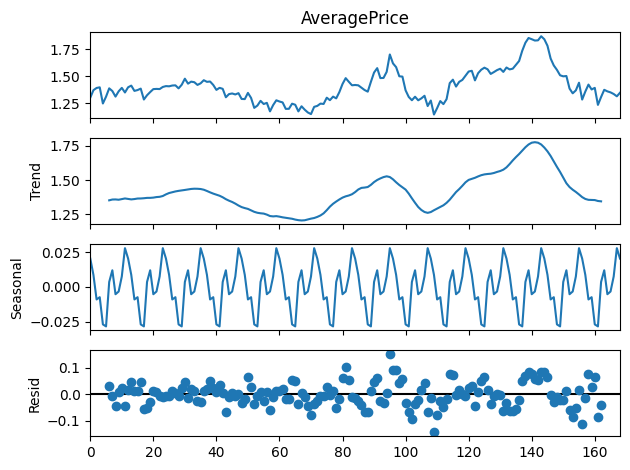

In [17]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df_grouped = df.groupby('Date')['AveragePrice'].mean().reset_index()

period = 12

result = seasonal_decompose(df_grouped['AveragePrice'], model='additive', period=period)
result.plot()
plt.show()

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

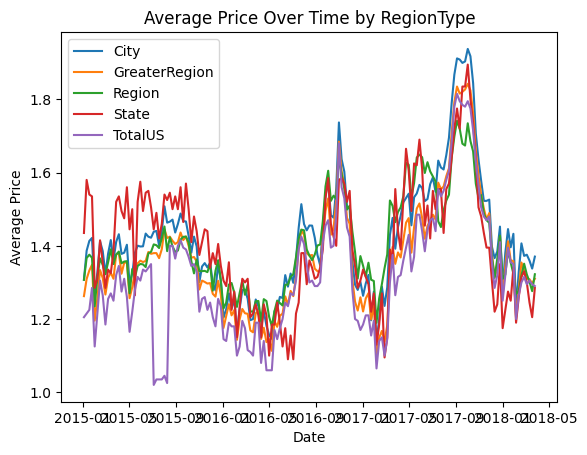

In [18]:
# Group by 'Date' and 'region_type' and calculate the mean of 'AveragePrice'
df_grouped = df.groupby(['Date', 'region_type'])['AveragePrice'].mean().reset_index()

# Create separate plots for each region_type
for region_type in df_grouped['region_type'].unique():
    region_type_data = df_grouped[df_grouped['region_type'] == region_type]
    plt.plot(region_type_data['Date'], region_type_data['AveragePrice'], label=region_type)

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time by RegionType')
plt.legend()
plt.show()

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

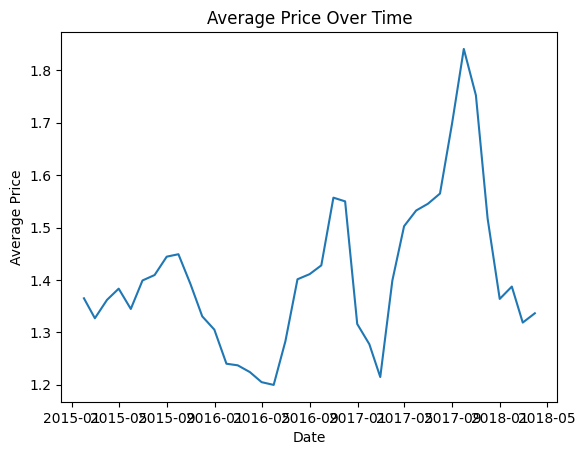

In [20]:
# Using AveragePrice and Date calculate and compare average monthly prices
df_grouped = df.groupby(pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean().reset_index()

# Plot the average monthly
plt.plot(df_grouped['Date'], df_grouped['AveragePrice'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time')
plt.show()

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

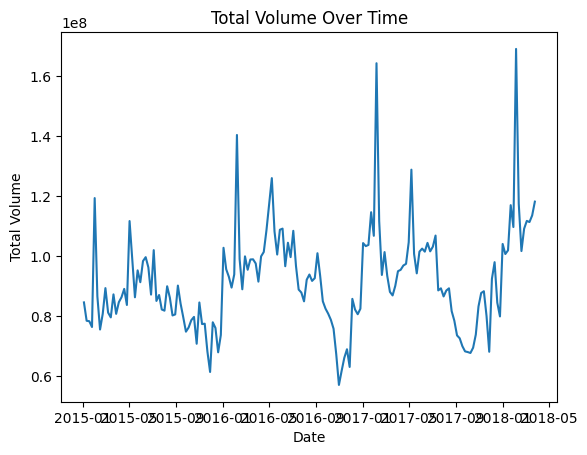

In [21]:
df_grouped = df.groupby('Date')['Total Volume'].sum().reset_index()
plt.plot(df_grouped['Date'], df_grouped['Total Volume'])
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.title('Total Volume Over Time')
plt.show()


5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

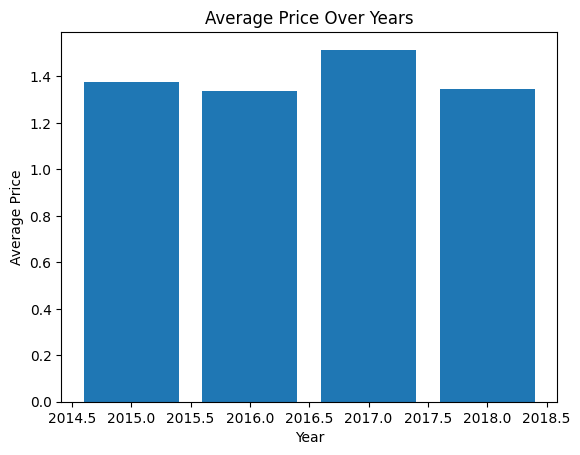

In [22]:
df_grouped = df.groupby('year')['AveragePrice'].mean().reset_index()
plt.bar(df_grouped['year'], df_grouped['AveragePrice'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Over Years')
plt.show()
